In [83]:
# importing required packages 
import os 
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [84]:
# defined data path 
data_path="Data/chest_x_ray"

In [85]:
# denfining image size
image_size=150 

In [86]:
# creating empty x and y list for image_data(array) and y for category label
x=[]
y=[]

In [87]:
# labels of target
category=["NORMAL","PNEUMONIA"]

In [88]:
# preprocessing image data
for label in category: 
    folder_path=os.path.join(data_path,label)
    class_num=1 if label == "PNEUMONIA" else 0 

    for image_name in os.listdir(folder_path): 
        image_path=os.path.join(folder_path,image_name)

        img=cv2.imread(image_path)
        if img is None: 
            continue
        img=cv2.resize(img,(image_size,image_size))
        img=img/255.0 

        x.append(img)
        y.append(class_num)


In [89]:
# convert into array 
x=np.array(x)
y=np.array(y)

In [90]:
# function to plot image
def plot_image(x,y,index): 
    plt.figure(figsize=(10,3))
    plt.imshow(x[index])
    plt.xlabel(category[y[index]])

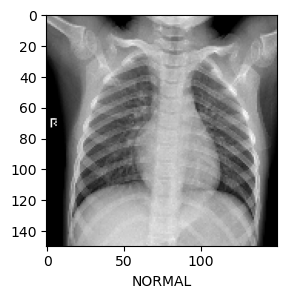

In [91]:
plot_image(x,y,1)

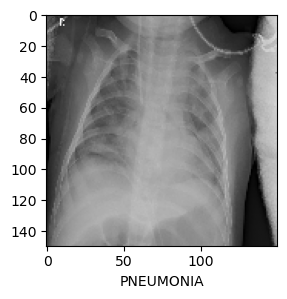

In [92]:
plot_image(x,y,2002)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# split data into train and test for model training and evaluation
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [95]:
# shape of train and test data
print(train_x.shape)
print(test_x.shape)

(4684, 150, 150, 3)
(1172, 150, 150, 3)


In [96]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras import layers

In [97]:
# creating cnn layers along with ann
model=Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(image_size,image_size,3)), 
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"), 
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=120,kernel_size=(3,3),activation="relu"), 
    layers.MaxPool2D((2,2)),

    layers.Flatten(), 
    Dense(30,activation="relu"), 
    Dense(20,activation="relu"),
    Dense(1,activation="sigmoid")
]
)

In [98]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 34, 34, 120)    │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 17, 17, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 34680)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 30)             │     1,040,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,129,703 (4.31 MB)

 Trainable params: 1,129,703 (4.31 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# defining optimizers and loss function
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
loss_function=tf.keras.losses.BinaryCrossentropy()

In [100]:
# compling model
model.compile(optimizer=opt,loss=loss_function,metrics=["accuracy"])

In [101]:
# model training 
history=model.fit(train_x,train_y,epochs=10)

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 28s 180ms/step - accuracy: 0.6963 - loss: 0.7679
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 28s 194ms/step - accuracy: 0.8118 - loss: 0.4321
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 30s 205ms/step - accuracy: 0.8227 - loss: 0.4163
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.9127 - loss: 0.2205
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 32s 214ms/step - accuracy: 0.9427 - loss: 0.1598
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 29s 196ms/step - accuracy: 0.9565 - loss: 0.1273
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 27s 186ms/step - accuracy: 0.9532 - loss: 0.1274
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 27s 184ms/step - accuracy: 0.9648 - loss: 0.0969
Epoch 9/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 27s 186ms/step - accuracy: 0.9634 - loss: 0.0943
Epoch 10/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 28s 193ms/step - accuracy: 0.9674 - loss: 0.0801


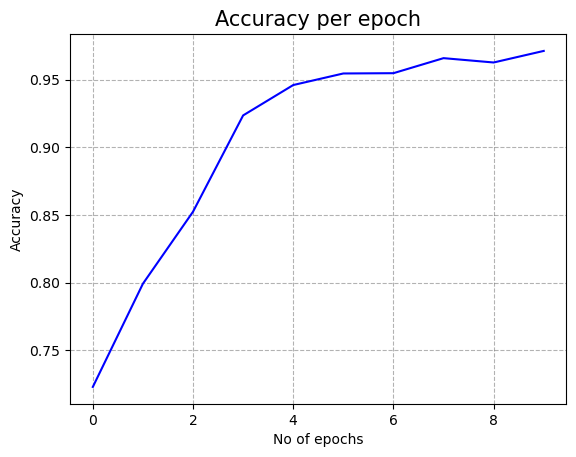

In [102]:
# plotting accuracy per epoch
plt.plot(history.history["accuracy"],color="blue")
plt.xlabel("No of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch",fontsize=15)
plt.grid(linestyle="--",alpha=0.3,color="black")
plt.show()

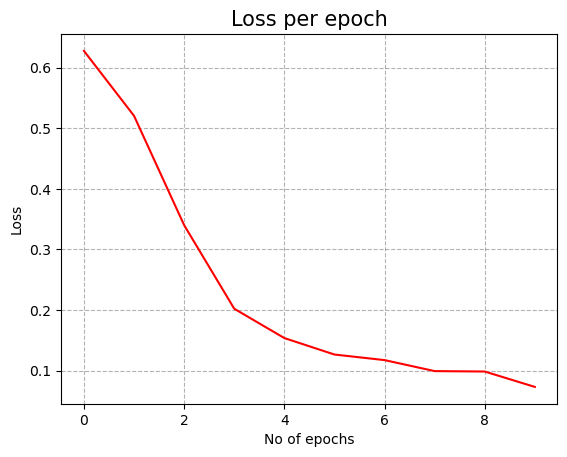

In [103]:
# plotting loss per epoch
plt.plot(history.history["loss"],color="red")
plt.xlabel("No of epochs") 
plt.ylabel("Loss")
plt.title("Loss per epoch",fontsize=15)
plt.grid(linestyle="--",alpha=0.3,color="black")
plt.show()

In [104]:
# evaluation 
ev=model.evaluate(test_x,test_y)
print("Accuracy:",ev[1])
print("loss:",ev[0])

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9540 - loss: 0.1236
Accuracy: 0.9513651728630066
loss: 0.1395549327135086


In [105]:
# function for prediction
def detect(img_path): 
    img=cv2.imread(image_path)
    img=cv2.resize(img,(150,150))
    img=img/255.0 
    img=np.expand_dims(img,axis=0)

    pred=model.predict(img)

    if pred == 0: 
        return "NORMAL"
    else: 
        return "PNEUMONIA"

In [107]:
import joblib 

joblib.dump(model,"model.h5")

['model.h5']